# KNN


In [ ]:
import pandas as pd
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets

# Importacion KNN
from sklearn.neighbors import KNeighborsClassifier

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split

# Entrenamiento con todos los features

In [ ]:
# Divido el set en entrenamiento y validacion
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
knn_con_todos_los_features = KNeighborsClassifier()
knn_con_todos_los_features.fit(X_train, y_train)
y_pred = knn_con_todos_los_features.predict(X_test)

# Metricas

Accuracy: 0.8172884999232305

Precision: 0.6179310344827587

Recall: 0.8887773539449909

F1 Score: 0.6009389671361502

Matriz de confusion: 
[[4427  554]
 [ 636  896]]

AUC-ROC: 



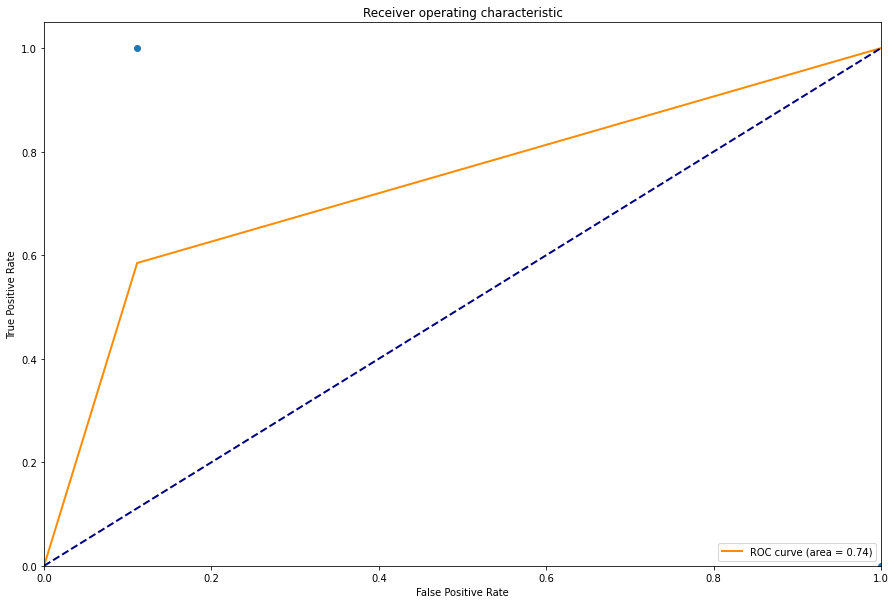

0.7368168754059159

In [ ]:
m.getMetrics(y_test, y_pred)

# Entrenamiento con seleccion

In [ ]:
# Divido el set en entrenamiento y validacion
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.feature_engineering_TP_primera_parte(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
knn_con_seleccion = KNeighborsClassifier()
knn_con_seleccion.fit(X_train, y_train)
y_pred = knn_con_seleccion.predict(X_test)

# Metricas

Accuracy: 0.7650852141870106

Precision: 0.512045347189419

Recall: 0.790551500405515

F1 Score: 0.5862628447809627

Matriz de confusion: 
[[3899 1033]
 [ 497 1084]]

AUC-ROC: 



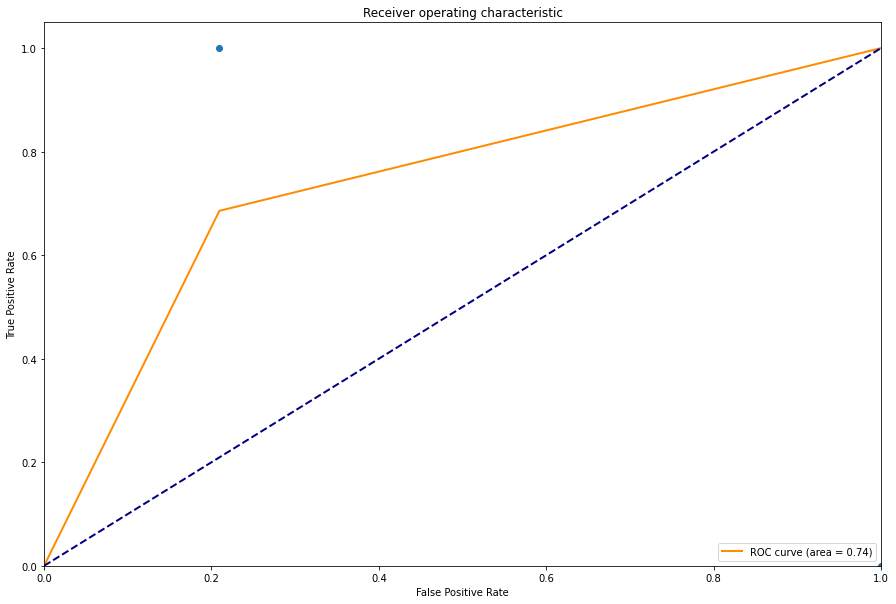

0.7380967495702465

In [ ]:
m.getMetrics(y_test, y_pred)

# Prediccion

In [ ]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataValidation()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

# Aplico feature engineering
dfObjetivo_feature_engineering = pp.feature_engineering_KNN_SVM_Naive_Bayes(dfObjetivo)

predicciones = knn_con_todos_los_features.predict(dfObjetivo_feature_engineering)
predicciones

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
fp.exportPredictions(fp.formatPredictions(predicciones), "KNN")